In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_5648\2167922700.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [3]:
# tentang dataset
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

![Alt text](image-2.png)

# **Perform Data Standard Cleaning**
## 1. Missing Values

In [4]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

Kolom license hanya berisi 2 value, sisanya kosong. jadi kita drop saja kolom tersebut

In [5]:
df.drop('license', axis=1, inplace=True)

<50% rule

In [6]:
# persen untuk setiap baris yang datanya ilang
persen = df.isnull().sum()/df.shape[0] * 100

# create a DataFrame to show case the result
persen = pd.DataFrame({"columns": persen.keys(), "%": persen})
persen.reset_index(drop=True, inplace=True)
persen

,columns,%
0,id,0.000000
1,NAME,0.243667
2,host id,0.000000
3,host_identity_verified,0.281679
4,host name,0.395715
5,neighbourhood group,0.028265
6,neighbourhood,0.015595
7,lat,0.007797
8,long,0.007797
9,country,0.518524


Ternyata kehilangan data di antaranya hanyalah sedikit, terkecuali:
1. last review
2. reviews per month
3. house_rules

Selain ketiga kolom tersebut, semuanya bisa didrop saja barisnya yang null

In [7]:
# biar lebih enak diliat
df.describe().style.background_gradient(cmap='Greens')

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,102599.000000,102599.000000,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,29146234.522130,49254111474.328667,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,16257505.607309,28538996644.374878,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1001254.000000,123600518.000000,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,15085814.500000,24583328475.000000,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,29136603.000000,49117739352.000000,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,43201198.000000,73996495817.000000,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,57367417.000000,98763129024.000000,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


Beberapa hal ganjil yang akan dilakukan outlier handling:
1. minimum_nights dari -1223 s/d 5654????
2. availability 365 (days booked) dari -10 s/d 3677

In [8]:
# Karena namanya juga masih ada spasi, yang gabakal bisa diolah 
# ubah jadi _

columns = ['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules']

df.columns = [col.lower().replace(" ","_") for col in df.columns]
df.head(3)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."


## **Tinjau satu per satu kolom**

**id**

In [9]:
# Kolom id dan host_id sama keunikannya
# Simpan salah satu saja

df["id"].unique().shape[0]/df["id"].shape[0] * 100

99.47270441232371

**name**

In [10]:
uniq = df["name"].unique().shape[0]/df["name"].shape[0] * 100
lost = df["name"].isnull().sum()/df["name"].shape[0] * 100

print(uniq, lost)

59.729626994415156 0.24366709227185449


In [11]:
# memiliki 59% value unique dan missing value hanya 0.24
# karena kolom ini tidak akan terllau berguna untuk ML
# yang NaN diganti none saja

df["name"].value_counts()

Home away from home                               33
Hillside Hotel                                    30
Water View King Bed Hotel Room                    30
New york Multi-unit building                      27
Brooklyn Apartment                                27
                                                  ..
♂ ♀ Sunny Bedroom in Popular Brooklyn              1
♂ ♀ Large Room Close to Express Subway + Bus       1
Clean room in Soho/Nolita                          1
♂ ♀ Large Sunny Bedroom Walk to Express Subway     1
Parisian Style Apartment in Heart of Brooklyn      1
Name: name, Length: 61281, dtype: int64

In [12]:
df["name"] = df["name"].fillna("none")

In [13]:
# sudah tidak ada yang NaN

df["name"].isnull().sum()/df["name"].shape[0] * 100

0.0

**host_id**

In [14]:
# Kolom host_id hampir 100% unik, maka tidak akan terlalu membantu
# Lebih baik didrop saja untuk mengurangi komputasi

df["host_id"].unique().shape[0]/df["host_id"].shape[0] * 100

99.47172974395461

In [15]:
df.drop(columns = ["host_id"], inplace = True)

**host_identity_verified**

In [16]:
uniq = df["host_identity_verified"].unique().shape[0]/df["host_identity_verified"].shape[0] * 100
lost = df["host_identity_verified"].isnull().sum()/df["host_identity_verified"].shape[0] * 100

print(uniq, lost)

0.0029240051072622537 0.2816791586662638


In [17]:
# data yang hilang sangat sedikit
# akan mengganggu ml, hilangkan saja yang NaN

df["host_identity_verified"].value_counts()

unconfirmed    51200
verified       51110
Name: host_identity_verified, dtype: int64

In [18]:
df.dropna(subset=['host_identity_verified'], inplace=True)

In [19]:
# sudah tidak ada yang NaN

df["host_identity_verified"].isnull().sum()/df["host_identity_verified"].shape[0] * 100

0.0

**host_name**

In [20]:
uniq = df["host_name"].unique().shape[0]/df["host_name"].shape[0] * 100
lost = df["host_name"].isnull().sum()/df["host_name"].shape[0] * 100

print(uniq, lost)

12.877529078291467 0.39585573257746065


In [21]:
# data yang hilang sangat sedikit
# tidak akan digunakan untuk ML
# yang NaN diganti menjadi none saja

df["host_name"].value_counts()

Michael               881
David                 760
John                  578
Alex                  546
Sonder (NYC)          513
                     ... 
Everett                 1
Jhovana                 1
Maureen And Josiah      1
Ish & Asa               1
Vlado & Sandra          1
Name: host_name, Length: 13174, dtype: int64

In [22]:
df["host_name"] = df["host_name"].fillna("none")

In [23]:
# tidak ada yang NaN

df["host_name"].isnull().sum()/df["host_name"].shape[0] * 100

0.0

**neighbourhood_group**

In [24]:
uniq = df["neighbourhood_group"].unique().shape[0]/df["neighbourhood_group"].shape[0] * 100
lost = df["neighbourhood_group"].isnull().sum()/df["neighbourhood_group"].shape[0] * 100

print(uniq, lost)

0.007819372495357248 0.020525852800312775


In [25]:
# data yang hilang hanya 29 baris, didrop saja
# ada data yang brookln dan manhatan. diubah ke yang sebenarnya

df["neighbourhood_group"].value_counts()

Manhattan        43675
Brooklyn         41719
Queens           13240
Bronx             2703
Staten Island      950
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

In [26]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace('brookln', 'Brooklyn')
df['neighbourhood_group'] = df['neighbourhood_group'].replace('manhatan', 'Manhattan')
df.dropna(subset=['neighbourhood_group'], inplace=True)

In [27]:
# Sudah oke

df["neighbourhood_group"].value_counts()

Manhattan        43676
Brooklyn         41720
Queens           13240
Bronx             2703
Staten Island      950
Name: neighbourhood_group, dtype: int64

In [28]:
# tidak ada yang NaN lagi

df["neighbourhood_group"].isnull().sum()/df["neighbourhood_group"].shape[0] * 100

0.0

**neighbourhood**

In [29]:
uniq = df["neighbourhood"].unique().shape[0]/df["neighbourhood"].shape[0] * 100
lost = df["neighbourhood"].isnull().sum()/df["neighbourhood"].shape[0] * 100

print(uniq, lost)

0.21996500112426556 0.01564195563550333


In [30]:
# data yang hilang sangat sedikit
# drop yang NaN

df["neighbourhood"].value_counts()

Bedford-Stuyvesant        7913
Williamsburg              7748
Harlem                    5440
Bushwick                  4972
Hell's Kitchen            3957
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64

In [31]:
df.dropna(subset=['neighbourhood'], inplace=True)

**lat**

In [32]:
uniq = df["lat"].unique().shape[0]/df["lat"].shape[0] * 100
lost = df["lat"].isnull().sum()/df["lat"].shape[0] * 100

print(uniq, lost)

21.482698268360174 0.007822201363018587


In [33]:
# data yang hilang sangat sedikit
# drop NaN

df["lat"].value_counts()

40.76411    36
40.71813    32
40.76125    28
40.73756    27
40.72440    25
            ..
40.78732     1
40.78700     1
40.65792     1
40.88452     1
40.83083     1
Name: lat, Length: 21970, dtype: int64

In [34]:
df.dropna(subset=['lat'], inplace=True)

**long**

In [35]:
uniq = df["long"].unique().shape[0]/df["long"].shape[0] * 100
lost = df["long"].isnull().sum()/df["long"].shape[0] * 100

print(uniq, lost)

17.3656676282208 0.0


In [36]:
# data yang hilang sangat sedikit
# drop NaN

df["long"].value_counts()

-73.993710    44
-73.953500    40
-73.947910    37
-73.954270    36
-73.949770    34
              ..
-73.950464     1
-73.944082     1
-73.912348     1
-73.913128     1
-74.147810     1
Name: long, Length: 17759, dtype: int64

In [37]:
df.dropna(subset=['long'], inplace=True)

**country**

In [38]:
uniq = df["country"].unique().shape[0]/df["country"].shape[0] * 100
lost = df["country"].isnull().sum()/df["country"].shape[0] * 100

print(uniq, lost)

0.0019557033198063854 0.5143499731090793


In [39]:
# Semua datanya adalah United States
# considering untuk didrop kolomnya

df["country"].value_counts()

United States    101739
Name: country, dtype: int64

**country_code**

In [40]:
uniq = df["country_code"].unique().shape[0]/df["country_code"].shape[0] * 100
lost = df["country_code"].isnull().sum()/df["country_code"].shape[0] * 100

print(uniq, lost)

0.0019557033198063854 0.11734219918838312


In [41]:
# Semua datanya adalah United States
# considering untuk didrop kolomnya

df["country_code"].value_counts()

US    102145
Name: country_code, dtype: int64

Seperti yang telah dijelaskan pada datasetnya, data yang disajikan semuanya berasal dari amerika serikat. Kedua kolom tersebut bisa didrop

In [42]:
df.drop(columns = ["country_code", "country"], axis = 1, inplace = True)

**instant_bookable**

In [43]:
uniq = df["instant_bookable"].unique().shape[0]/df["instant_bookable"].shape[0] * 100
lost = df["instant_bookable"].isnull().sum()/df["instant_bookable"].shape[0] * 100

print(uniq, lost)

0.002933554979709578 0.09191805603090011


In [44]:
# data yang hilang sangat sedikit
# drop NaN

df["instant_bookable"].value_counts()

False    51309
True     50862
Name: instant_bookable, dtype: int64

In [45]:
df.dropna(subset=['instant_bookable'], inplace=True)

**cancellation_policy**

In [46]:
uniq = df["cancellation_policy"].unique().shape[0]/df["cancellation_policy"].shape[0] * 100
lost = df["cancellation_policy"].isnull().sum()/df["cancellation_policy"].shape[0] * 100

print(uniq, lost)

0.0029362539272396277 0.0


In [47]:
# data yang hilang sangat sedikit
# drop NaN

df["cancellation_policy"].value_counts()

moderate    34232
strict      33991
flexible    33948
Name: cancellation_policy, dtype: int64

In [48]:
df.dropna(subset=['cancellation_policy'], inplace=True)

**room_type**

In [49]:
uniq = df["room_type"].unique().shape[0]/df["room_type"].shape[0] * 100
lost = df["room_type"].isnull().sum()/df["room_type"].shape[0] * 100

print(uniq, lost)

0.003915005236319503 0.0


In [50]:
# tidak ada data yang hilang
# datanya pun oke

df["room_type"].value_counts()

Entire home/apt    53474
Private room       46362
Shared room         2219
Hotel room           116
Name: room_type, dtype: int64

**construction_year**

In [51]:
uniq = df["construction_year"].unique().shape[0]/df["construction_year"].shape[0] * 100
lost = df["construction_year"].isnull().sum()/df["construction_year"].shape[0] * 100

print(uniq, lost)

0.020553777490677393 0.18400524610701666


In [52]:
# data yang hilangnya sedikit
# bentuknya float, ubah ke integer
# data yang lost juga < 50% jadi didrop saja dulu
df["construction_year"].value_counts()

2014.0    5223
2008.0    5204
2006.0    5200
2019.0    5184
2009.0    5147
2020.0    5140
2010.0    5137
2022.0    5119
2012.0    5111
2005.0    5103
2003.0    5100
2007.0    5088
2015.0    5073
2011.0    5043
2017.0    5041
2018.0    5033
2021.0    5021
2004.0    5013
2013.0    5002
2016.0    5001
Name: construction_year, dtype: int64

In [53]:
# drop yang NaN
df.dropna(subset=['construction_year'], inplace=True)

In [54]:
# ubah ke integer
df["construction_year"] = df["construction_year"].astype(int)

**price**

In [55]:
uniq = df["price"].unique().shape[0]/df["price"].shape[0] * 100
lost = df["price"].isnull().sum()/df["price"].shape[0] * 100

print(uniq, lost)

1.1296000313777788 0.22846945079081807


In [56]:
# data price masih berbentuk integer
# terdapat $ di depannya, perlu dihilangkan
# sekalian yang NA didrop aja
# soalnya kalo dikasih 0 ga valid dong

df["price"].value_counts()

$206       136
$1,056     130
$481       129
$833       128
$573       127
          ... 
$369        58
$923        57
$786        53
$89         52
$187        52
Name: price, Length: 1151, dtype: int64

In [57]:
# untuk menghilangkan $ dan apabila dia NaN maka akan dikembalikan NaN
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$", "").replace(",", "").replace(" ", ""))
    
df["price"] = df["price"].apply(lambda x: remove_dollar_sign(x))

In [58]:
df["price"].value_counts()

206.0     136
1056.0    130
481.0     129
833.0     128
573.0     127
         ... 
369.0      58
923.0      57
786.0      53
89.0       52
187.0      52
Name: price, Length: 1151, dtype: int64

In [59]:
df.dropna(subset=['price'], inplace=True)

**service_fee**

In [60]:
uniq = df["service_fee"].unique().shape[0]/df["service_fee"].shape[0] * 100
lost = df["service_fee"].isnull().sum()/df["service_fee"].shape[0] * 100

print(uniq, lost)

0.228009828009828 0.22506142506142504


In [61]:
# data service_fee masih berbentuk integer
# terdapat $ di depannya, perlu dihilangkan
# yang NA didrop aja karena kalo 0 ga valid datanya dong

df["service_fee"].value_counts()

$41      519
$216     519
$81      515
$57      512
$177     511
        ... 
$58      382
$73      380
$67      378
$10      263
$240     247
Name: service_fee, Length: 231, dtype: int64

In [62]:
df["service_fee"] = df["service_fee"].apply(lambda x: remove_dollar_sign(x))

In [63]:
df["service_fee"].value_counts()

41.0     519
216.0    519
81.0     515
57.0     512
177.0    511
        ... 
58.0     382
73.0     380
67.0     378
10.0     263
240.0    247
Name: service_fee, Length: 231, dtype: int64

In [64]:
df.dropna(subset=['service_fee'], inplace=True)

**minimum_nights**

In [65]:
uniq = df["minimum_nights"].unique().shape[0]/df["minimum_nights"].shape[0] * 100
lost = df["minimum_nights"].isnull().sum()/df["minimum_nights"].shape[0] * 100

print(uniq, lost)

0.14676766383309858 0.380216900936752


In [66]:
df["minimum_nights"].value_counts()

1.0      25194
2.0      23371
3.0      15952
30.0     11527
4.0       6559
         ...  
122.0        1
340.0        1
184.0        1
153.0        1
825.0        1
Name: minimum_nights, Length: 148, dtype: int64

In [67]:
# yang datanya NaN diubah ke 0
# ini beberapa datanya aneh, masa minimum nightsnya 273? nanti handling outlier

df["minimum_nights"] = np.array(df["minimum_nights"], dtype = np.int16)

In [68]:
df["minimum_nights"].value_counts()

 1      25194
 2      23371
 3      15952
 30     11527
 4       6559
        ...  
 81         1
 160        1
-3          1
 175        1
 825        1
Name: minimum_nights, Length: 149, dtype: int64

**number_of_review**

In [69]:
uniq = df["number_of_reviews"].unique().shape[0]/df["number_of_reviews"].shape[0] * 100
lost = df["number_of_reviews"].isnull().sum()/df["number_of_reviews"].shape[0] * 100

print(uniq, lost)

0.4678834920853813 0.17927325380955664


In [70]:
df["number_of_reviews"].value_counts()

0.0      15618
1.0      10304
2.0       7111
3.0       5329
4.0       4112
         ...  
367.0        1
648.0        1
567.0        1
592.0        1
300.0        1
Name: number_of_reviews, Length: 474, dtype: int64

In [71]:
# yang datanya NaN diubah ke 0 dan convert ke integer
df["number_of_reviews"] = np.array(df["number_of_reviews"], dtype = np.int16)

**last_review**

In [72]:
uniq = df["last_review"].unique().shape[0]/df["last_review"].shape[0] * 100
lost = df["last_review"].isnull().sum()/df["last_review"].shape[0] * 100

print(uniq, lost)

2.41033874764827 15.524866776331992


In [73]:
df["last_review"].value_counts()

6/23/2019     2416
6/30/2019     2209
7/1/2019      2190
6/24/2019     1491
7/7/2019      1145
              ... 
8/15/2014        1
7/10/2014        1
12/14/2020       1
12/22/2014       1
4/15/2014        1
Name: last_review, Length: 2446, dtype: int64

In [74]:
# ini yang ilang agak banyak juga
# gabakl terlalu berguna, didrop aja kolomnya

df.drop(columns = ["last_review"], axis = 1, inplace = True)

**reviews_per_month**

In [75]:
uniq = df["reviews_per_month"].unique().shape[0]/df["reviews_per_month"].shape[0] * 100
lost = df["reviews_per_month"].isnull().sum()/df["reviews_per_month"].shape[0] * 100

print(uniq, lost)

1.0017631820017534 15.518956669063543


In [76]:
# yang ilang agak banyak
# gabakal terlalu berguna karena udah ada review rate skala 1 - 5
# drop kolom

df["reviews_per_month"].value_counts()

0.03     1657
0.05     1470
1.00     1449
0.04     1257
0.09     1247
         ... 
9.23        1
9.10        1
10.36       1
8.50        1
33.08       1
Name: reviews_per_month, Length: 1016, dtype: int64

In [77]:
df.drop(columns = ["reviews_per_month"], axis = 1, inplace = True)

**reviews_rate_number**

In [78]:
uniq = df["review_rate_number"].unique().shape[0]/df["review_rate_number"].shape[0] * 100
lost = df["review_rate_number"].isnull().sum()/df["review_rate_number"].shape[0] * 100

print(uniq, lost)

0.005910107268446922 0.2886102382758247


In [79]:
# data yang ilang tidak terlalu banyak
# didrop yang NaN

df["review_rate_number"].value_counts()

5.0    23140
4.0    23077
3.0    23056
2.0    22873
1.0     9082
Name: review_rate_number, dtype: int64

In [80]:
df.dropna(subset=['review_rate_number'], inplace=True)

**calculated_host_listings_count**

In [81]:
uniq = df["calculated_host_listings_count"].unique().shape[0]/df["calculated_host_listings_count"].shape[0] * 100
lost = df["calculated_host_listings_count"].isnull().sum()/df["calculated_host_listings_count"].shape[0] * 100

print(uniq, lost)

0.07804164855573556 0.245979373295926


In [82]:
# data yang sedikit
# didrop aja yang NaN

df["calculated_host_listings_count"].value_counts()

1.0     62645
2.0     14262
3.0      6483
4.0      3515
5.0      1964
        ...  
22.0       20
86.0       20
55.0       15
46.0        9
80.0        7
Name: calculated_host_listings_count, Length: 78, dtype: int64

In [83]:
df.dropna(subset=['calculated_host_listings_count'], inplace=True)

**availability_365**

In [84]:
uniq = df["availability_365"].unique().shape[0]/df["availability_365"].shape[0] * 100
lost = df["availability_365"].isnull().sum()/df["availability_365"].shape[0] * 100

print(uniq, lost)

0.43474385763376544 0.38918983154913395


In [85]:
# ini kan jumlah hari propertynya available dalam 1 tahun
# kalau datanya minus ilangin minusnya
# ini sama aja kayak days booked

df["availability_365"].value_counts()

0.0       23235
365.0      2473
364.0      1154
89.0        745
1.0         723
          ...  
417.0        32
408.0        31
391.0        30
401.0        29
3677.0        1
Name: availability_365, Length: 438, dtype: int64

In [86]:
# data minus ditarik ke 0

df["availability_365"] = df["availability_365"].abs()

In [87]:
# data yang > 420, ditarik ke 420 aja

df.loc[df["availability_365"] > 420, "availability_365"] = 420

In [88]:
# data yang ilang dikit
# drop NaN

df.dropna(subset=['availability_365'], inplace=True)

**house_rules**

In [89]:
uniq = df["house_rules"].unique().shape[0]/df["house_rules"].shape[0] * 100
lost = df["house_rules"].isnull().sum()/df["house_rules"].shape[0] * 100

print(uniq, lost)

1.9654822738750921 50.847036366890016


In [90]:
# karena datanya string dan gaakan terlalu berguna
# drop saja kolomnya

df.drop(columns = ["house_rules"], axis = 1, inplace = True)

## 2. Duplicated Values

In [91]:
df.duplicated().sum(0)

534

In [92]:
df.drop_duplicates(inplace=True)

In [93]:
df.duplicated().sum(0)

0

Sudah tidak ada duplicated value

## 3. Outlier Handling

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100052 entries, 0 to 102044
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100052 non-null  int64  
 1   name                            100052 non-null  object 
 2   host_identity_verified          100052 non-null  object 
 3   host_name                       100052 non-null  object 
 4   neighbourhood_group             100052 non-null  object 
 5   neighbourhood                   100052 non-null  object 
 6   lat                             100052 non-null  float64
 7   long                            100052 non-null  float64
 8   instant_bookable                100052 non-null  object 
 9   cancellation_policy             100052 non-null  object 
 10  room_type                       100052 non-null  object 
 11  construction_year               100052 non-null  int32  
 12  price           

Datanya sudah bersih, sekarang mari lakukan outlier handling

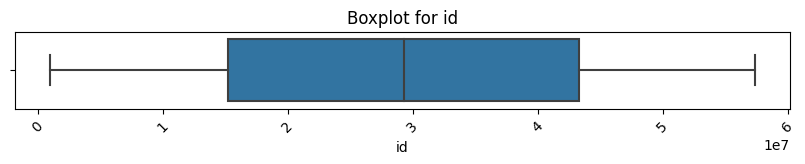

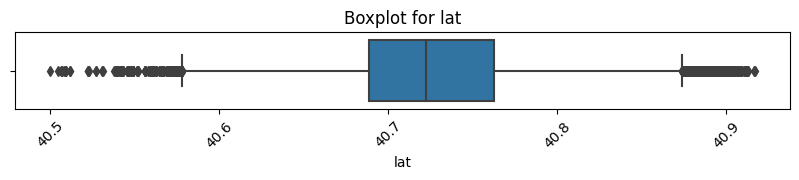

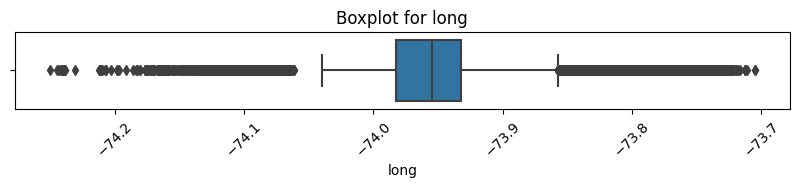

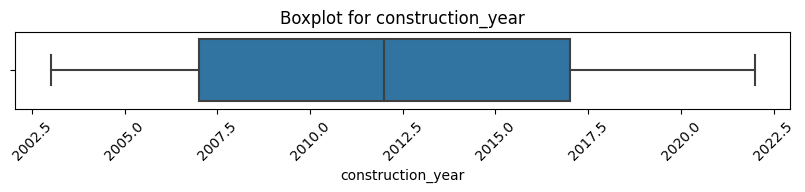

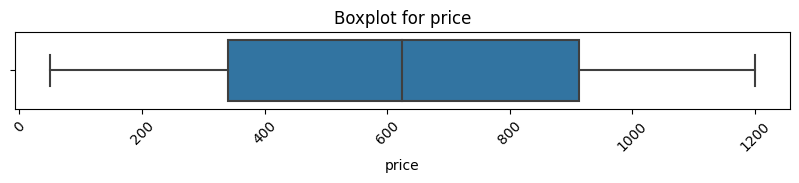

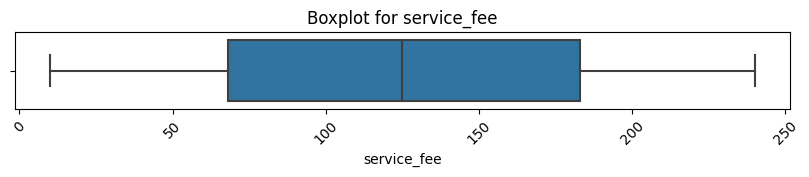

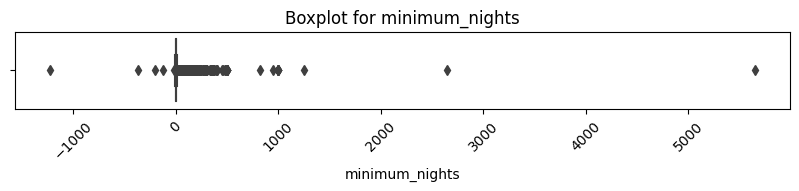

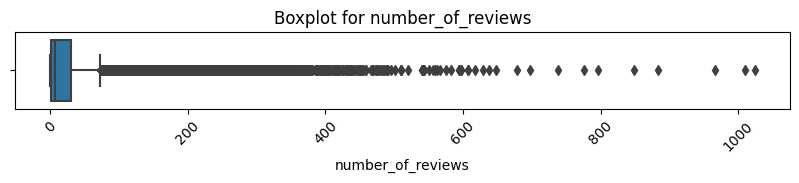

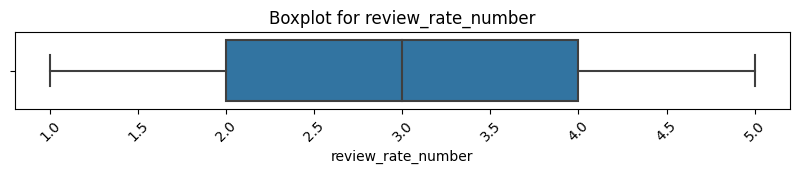

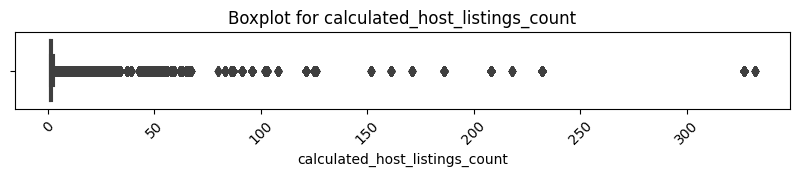

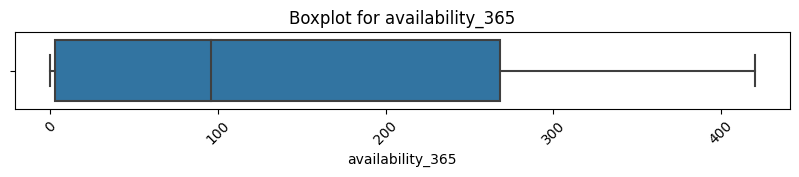

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter kolom yang bukan objek (string)
numeric_columns = df.select_dtypes(exclude=['object'])

# Membuat boxplot untuk setiap kolom numerik secara terpisah
for column in numeric_columns.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.xticks(rotation=45)
    plt.show()


Insight:
1. lat dan long tidak apa2 ada outlier, karena kan itu cuman koordinat latitude dan longitude
2. minimum_nights ini aneh banget, akan ditinjau ulang
3. number_of_review juga gapapa karena pasti beda2 tiap hotel jumlah yang reviewnya
4. calculated_host_listings_count gapapa banyak outlier karena dia kan jumlah pengunjung hotel

In [96]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [97]:
df['outlier_mn'] = check_outlier(data=df, column='minimum_nights')
mn = df[df['outlier_mn'] == 'outlier']

mn['minimum_nights'].value_counts()

30     11357
14      1047
15       569
29       548
31       443
       ...  
175        1
98         1
184        1
153        1
825        1
Name: minimum_nights, Length: 132, dtype: int64

In [98]:
mn['minimum_nights'].describe()

count    16932.000000
mean        34.329672
std         63.152006
min      -1223.000000
25%         30.000000
50%         30.000000
75%         30.000000
max       5645.000000
Name: minimum_nights, dtype: float64

Outliernya banyak, jadi gamungkin kalo didrop semua. Diubah aja dulu
1. Yang negatif, karena nilainya aneh2. Jadi ditarik dulu ke 0
2. batasnya 365, karena aneh kalau orang sewa hotel lebih dari 1 tahun

In [99]:
df.loc[df['minimum_nights'] < 0, 'minimum_nights'] = 0
df.loc[df['minimum_nights'] > 365, 'minimum_nights'] = 365

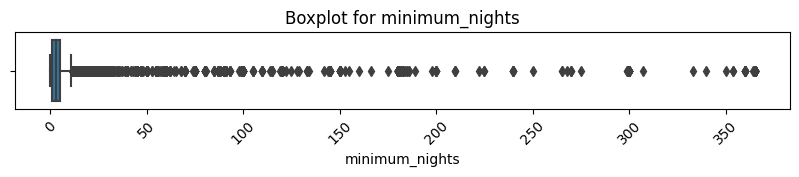

In [100]:
# boxplot yang baru

plt.figure(figsize=(10, 1))
sns.boxplot(x=df["minimum_nights"])
plt.title(f"Boxplot for minimum_nights")
plt.xticks(rotation=45)
plt.show()  

## 1. One Hot Encoding

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100052 entries, 0 to 102044
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100052 non-null  int64  
 1   name                            100052 non-null  object 
 2   host_identity_verified          100052 non-null  object 
 3   host_name                       100052 non-null  object 
 4   neighbourhood_group             100052 non-null  object 
 5   neighbourhood                   100052 non-null  object 
 6   lat                             100052 non-null  float64
 7   long                            100052 non-null  float64
 8   instant_bookable                100052 non-null  object 
 9   cancellation_policy             100052 non-null  object 
 10  room_type                       100052 non-null  object 
 11  construction_year               100052 non-null  int32  
 12  price           

Yang masih objek mari kita one hot encoding

In [102]:
from sklearn.preprocessing import LabelEncoder

**Host Identity Verified**

In [103]:
df['host_identity_verified'].value_counts()

unconfirmed    50072
verified       49980
Name: host_identity_verified, dtype: int64

In [104]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['host_identity_verified'] = host_identity_verified_le.fit_transform(df['host_identity_verified'])

df['host_identity_verified'].value_counts()
# unconfirmed --> 0 , verified --> 1

0    50072
1    49980
Name: host_identity_verified, dtype: int64

**Neighbourhood Group**

In [105]:
df['neighbourhood_group'].value_counts()

Manhattan        42721
Brooklyn         40803
Queens           12965
Bronx             2631
Staten Island      932
Name: neighbourhood_group, dtype: int64

In [106]:
le = LabelEncoder()
neighbourhood_group_le = LabelEncoder()
df['neighbourhood_group'] = neighbourhood_group_le.fit_transform(df['neighbourhood_group'])
df['neighbourhood_group'].value_counts()
# Brooklyn --> 1 , Manhattan --> 2 , Bronx --> 0 , Queens --> 3 , Staten Island --> 4 

2    42721
1    40803
3    12965
0     2631
4      932
Name: neighbourhood_group, dtype: int64

**Instnat Bookable**

In [107]:
df['instant_bookable'].value_counts()

False    50261
True     49791
Name: instant_bookable, dtype: int64

In [108]:
le = LabelEncoder()
instant_bookable_le = LabelEncoder()
df['instant_bookable'] = instant_bookable_le.fit_transform(df['instant_bookable'])
df['instant_bookable'].value_counts()
# False --> 0 , True --> 1 

0    50261
1    49791
Name: instant_bookable, dtype: int64

In [109]:
df['instant_bookable'].value_counts()

0    50261
1    49791
Name: instant_bookable, dtype: int64

**Cancellation Policy**

In [110]:
df['cancellation_policy'].value_counts()

moderate    33529
strict      33313
flexible    33210
Name: cancellation_policy, dtype: int64

In [111]:
le = LabelEncoder()
cancellation_policy_le = LabelEncoder()
df['cancellation_policy'] = cancellation_policy_le.fit_transform(df['cancellation_policy'])
df['cancellation_policy'].value_counts()
# moderate --> 1 , strict --> 2 , flexible --> 0

1    33529
2    33313
0    33210
Name: cancellation_policy, dtype: int64

**Room Type**

In [112]:
df['room_type'].value_counts()

Entire home/apt    52411
Private room       45371
Shared room         2157
Hotel room           113
Name: room_type, dtype: int64

In [113]:
le = LabelEncoder()
room_type_le = LabelEncoder()
df['room_type'] = room_type_le.fit_transform(df['room_type'])
df['room_type'].value_counts()
# Hotel room --> 1 , Private room --> 2 , Entire home/apt --> 0 , Shared room --> 3

0    52411
2    45371
3     2157
1      113
Name: room_type, dtype: int64

Maka sekarang data yang diperlukan sudah menjadi integer semua

In [114]:
df_new = df.iloc[:, 1:].select_dtypes(exclude=['object'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100052 entries, 0 to 102044
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          100052 non-null  int32  
 1   neighbourhood_group             100052 non-null  int32  
 2   lat                             100052 non-null  float64
 3   long                            100052 non-null  float64
 4   instant_bookable                100052 non-null  int32  
 5   cancellation_policy             100052 non-null  int32  
 6   room_type                       100052 non-null  int32  
 7   construction_year               100052 non-null  int32  
 8   price                           100052 non-null  float64
 9   service_fee                     100052 non-null  float64
 10  minimum_nights                  100052 non-null  int16  
 11  number_of_reviews               100052 non-null  int16  
 12  review_rate_numb

## 4. Air BnB Segmentation
Owner Air BnB Segmentation focus on Price and facility

In [115]:
df_new

,host_identity_verified,neighbourhood_group,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
0,0,1,40.64749,-73.97237,0,2,2,2020,966.0,193.0,10,9,4.0,6.0,286.0
1,1,2,40.75362,-73.98377,0,1,0,2007,142.0,28.0,30,45,4.0,2.0,228.0
3,0,1,40.68514,-73.95976,1,1,0,2005,368.0,74.0,30,270,4.0,1.0,322.0
4,1,2,40.79851,-73.94399,0,1,0,2009,204.0,41.0,10,9,3.0,1.0,289.0
5,1,2,40.74767,-73.97500,1,0,0,2013,577.0,115.0,3,74,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102040,1,3,40.76245,-73.87938,1,2,2,2022,982.0,196.0,1,239,2.0,2.0,361.0
102041,1,3,40.59380,-73.77373,1,1,2,2020,946.0,189.0,1,76,1.0,1.0,324.0
102042,1,2,40.79712,-73.96117,0,2,2,2012,706.0,141.0,1,4,4.0,1.0,0.0
102043,1,2,40.72318,-74.00223,0,0,0,2020,1043.0,209.0,2,21,4.0,2.0,343.0


<AxesSubplot:>

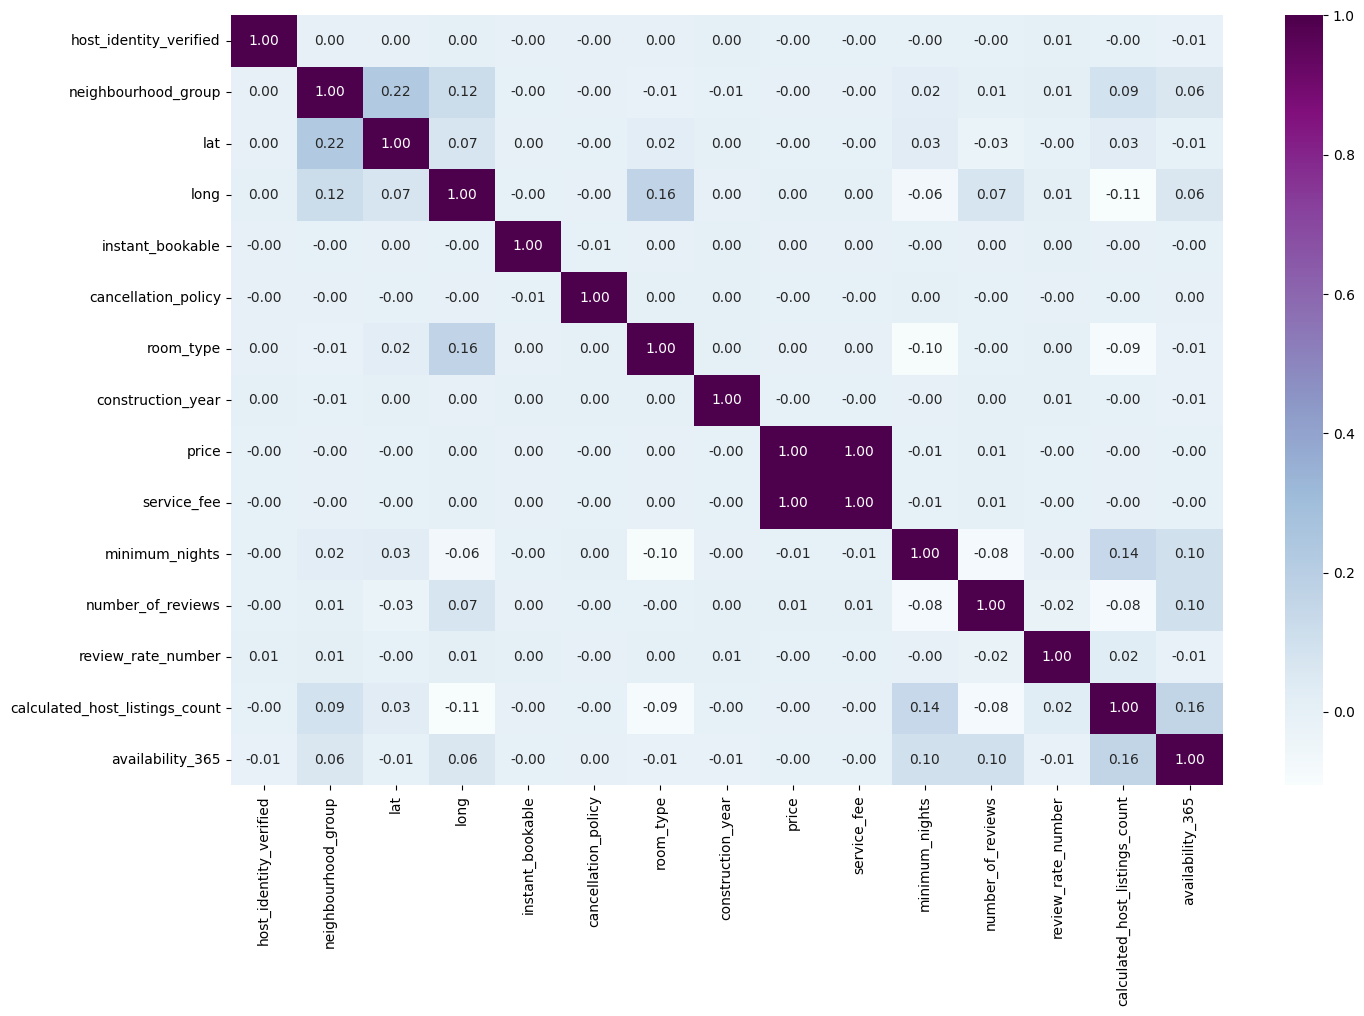

In [116]:
corr_= df_new.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

In [117]:
df_new.drop(columns=['service_fee'], inplace=True)

<AxesSubplot:>

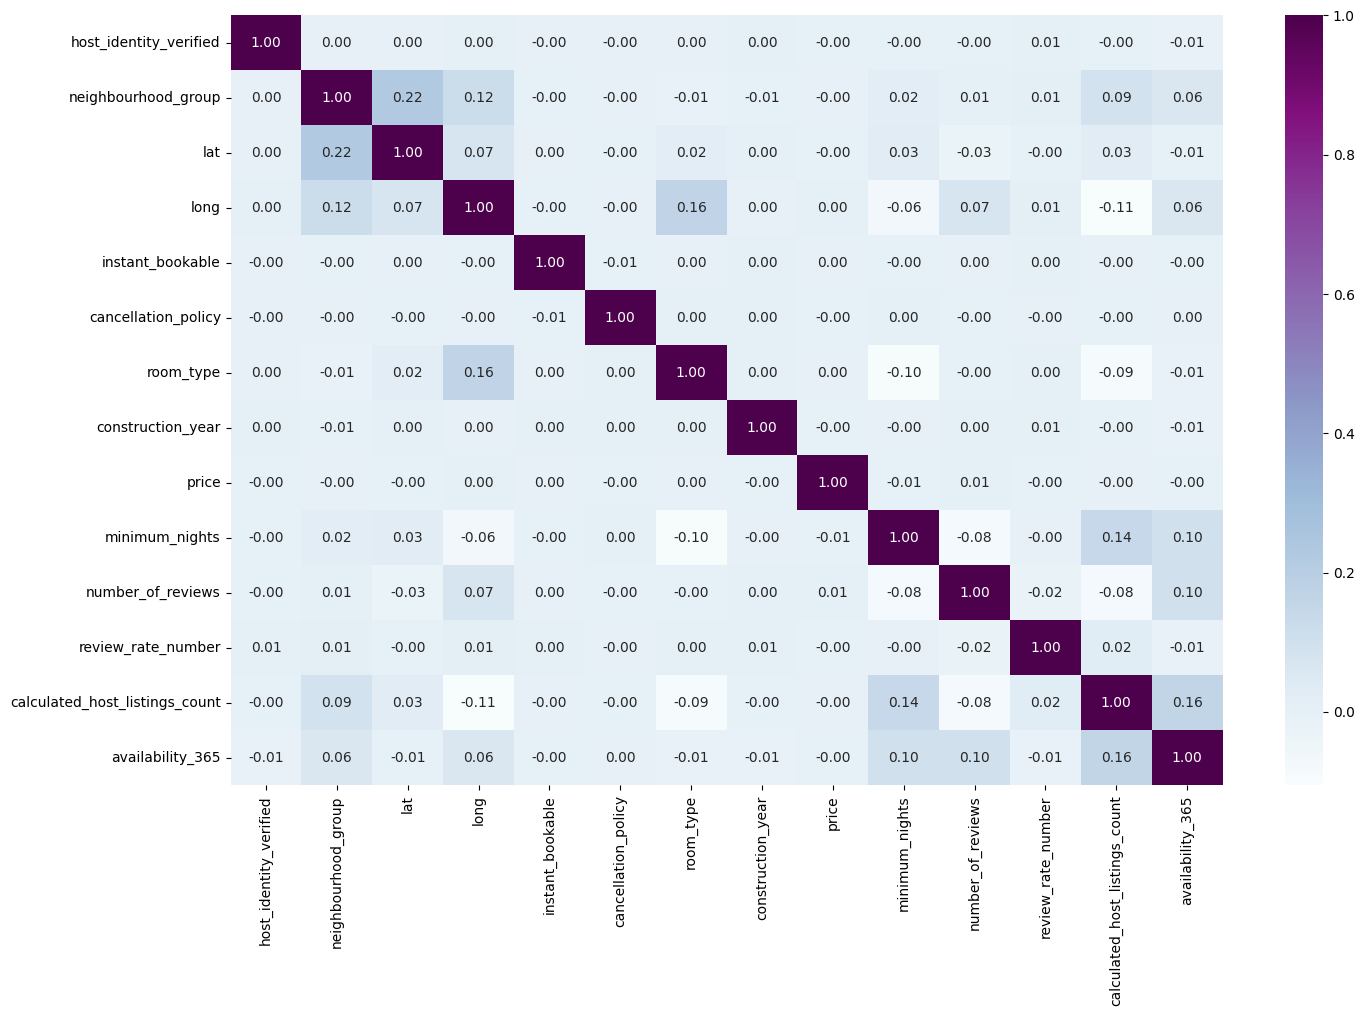

In [118]:
corr_= df_new.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

In [119]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# standard scaler
feats = list(df_new)


owner_sm_std = StandardScaler().fit_transform(df_new)

new_df = pd.DataFrame(data = owner_sm_std, columns = feats)
new_df.head(2)

,host_identity_verified,neighbourhood_group,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
0,-0.999081,-0.901282,-1.443013,-0.458696,-0.995313,1.225124,0.996432,1.303358,1.027039,0.116001,-0.371934,0.561303,-0.060649,1.076187
1,1.000920,0.409097,0.457742,-0.688694,-0.995313,-0.001263,-0.943575,-0.952117,-1.457167,1.225584,0.360160,0.561303,-0.184192,0.646110


c:\Users\Zenbook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Zenbook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Zenbook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Zenbook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

<AxesSubplot:>

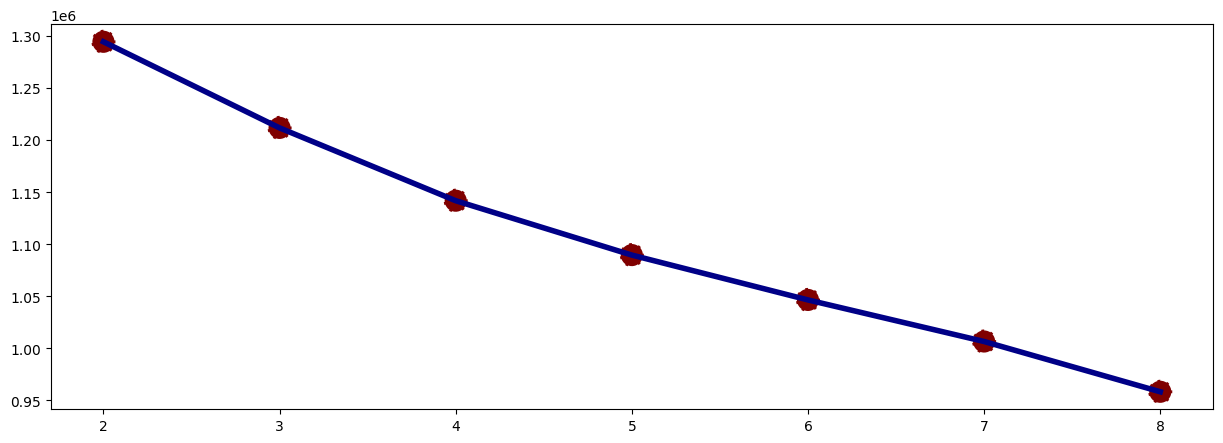

In [120]:
# Finding the best K from elbow method

from sklearn.cluster import KMeans

arr_inertia = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, random_state=31).fit(new_df)
    arr_inertia.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center.
    
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=range(2,9), y=arr_inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,9), y=arr_inertia, s=300, color='#800000',  linestyle='--')

Yang bagus adalah K = 6

[2, 3, 4, 5, 6, 7, 8]


c:\Users\Zenbook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Zenbook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Zenbook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Zenbook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

<AxesSubplot:>

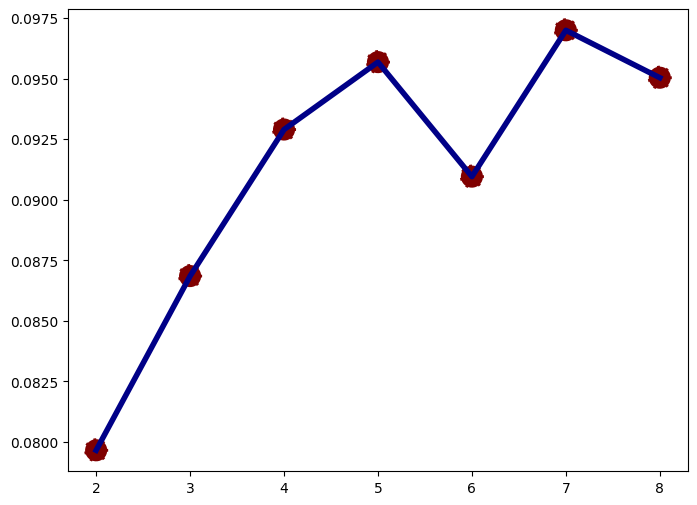

In [121]:
# Finding the best K from silhoutte mode

from sklearn.metrics import silhouette_score


range_n_clusters = list(range(2,9))
print(range_n_clusters) 

arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_df)
    preds = kmeans.predict(new_df)
     
    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,9), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,9), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

In [122]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df_new)
df_new['cluster'] = kmeans.labels_

c:\Users\Zenbook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [123]:
df_new.head(1)

,host_identity_verified,neighbourhood_group,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365,cluster
0,0,1,40.64749,-73.97237,0,2,2,2020,966.0,10,9,4.0,6.0,286.0,3


In [124]:
new_df.head(1)

,host_identity_verified,neighbourhood_group,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
0,-0.999081,-0.901282,-1.443013,-0.458696,-0.995313,1.225124,0.996432,1.303358,1.027039,0.116001,-0.371934,0.561303,-0.060649,1.076187


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

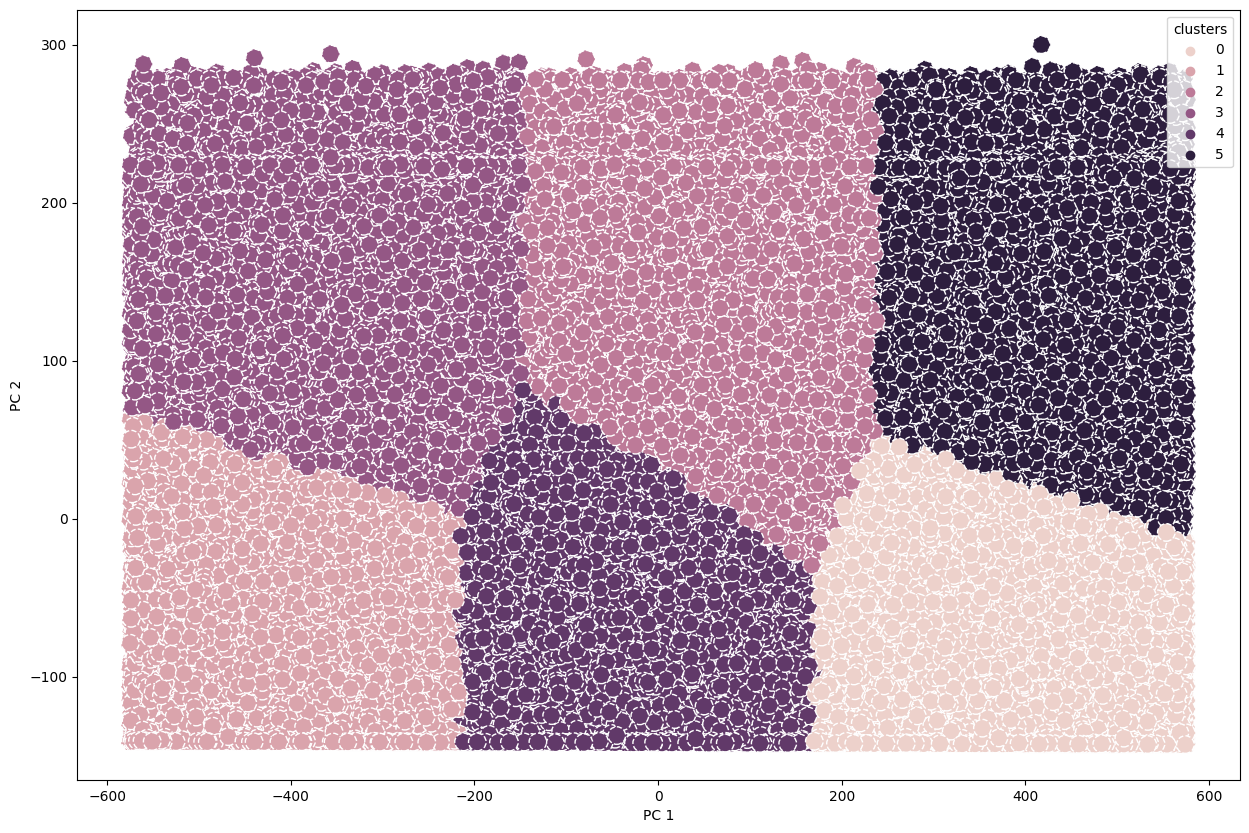

In [125]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_new)
pcs = pca.transform(df_new)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='white',
    linestyle='--',
    data=data_pca,
    s=160,
    ax=ax
)

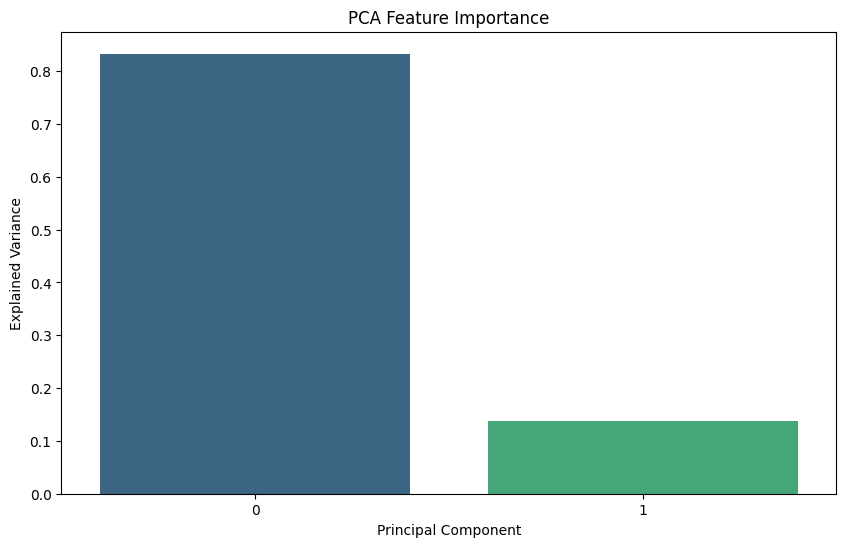

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pca_feature_importance(pca_model, feature_names, n_top_features=10):
    """
    Plots the feature importance of the top principal components from a PCA model.

    Parameters:
        pca_model (PCA): The PCA model.
        feature_names (list): List of feature names.
        n_top_features (int): Number of top features to plot (default is 10).
    """
    components = pca_model.components_
    explained_variance = pca_model.explained_variance_ratio_

    # Sort components by explained variance
    sorted_indices = explained_variance.argsort()[::-1]

    # Select the top N components
    top_components = sorted_indices[:n_top_features]

    # Create a DataFrame to hold feature importance information
    feature_importance_df = pd.DataFrame()
    feature_importance_df['Principal_Component'] = top_components
    feature_importance_df['Explained_Variance'] = explained_variance[top_components]

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Principal_Component', y='Explained_Variance', data=feature_importance_df, palette='viridis')
    plt.title('PCA Feature Importance')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance')
    plt.show()

# Contoh penggunaan fungsi
plot_pca_feature_importance(pca_model=pca, feature_names=df_new.columns, n_top_features=10)


In [126]:
df_new.head(3)

,host_identity_verified,neighbourhood_group,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365,cluster
0,0,1,40.64749,-73.97237,0,2,2,2020,966.0,10,9,4.0,6.0,286.0,3
1,1,2,40.75362,-73.98377,0,1,0,2007,142.0,30,45,4.0,2.0,228.0,5
3,0,1,40.68514,-73.95976,1,1,0,2005,368.0,30,270,4.0,1.0,322.0,5


In [129]:
clusters_count = df_new.groupby(['cluster'],as_index=False).size()
clusters_count['percentage'] = round((clusters_count['size'] / len(df_new)) * 100, 2)
clusters_count

,cluster,size,percentage
0,0,20871,20.86
1,1,19282,19.27
2,2,13413,13.41
3,3,14042,14.03
4,4,20707,20.70
5,5,11737,11.73


(0.0, 30.0)

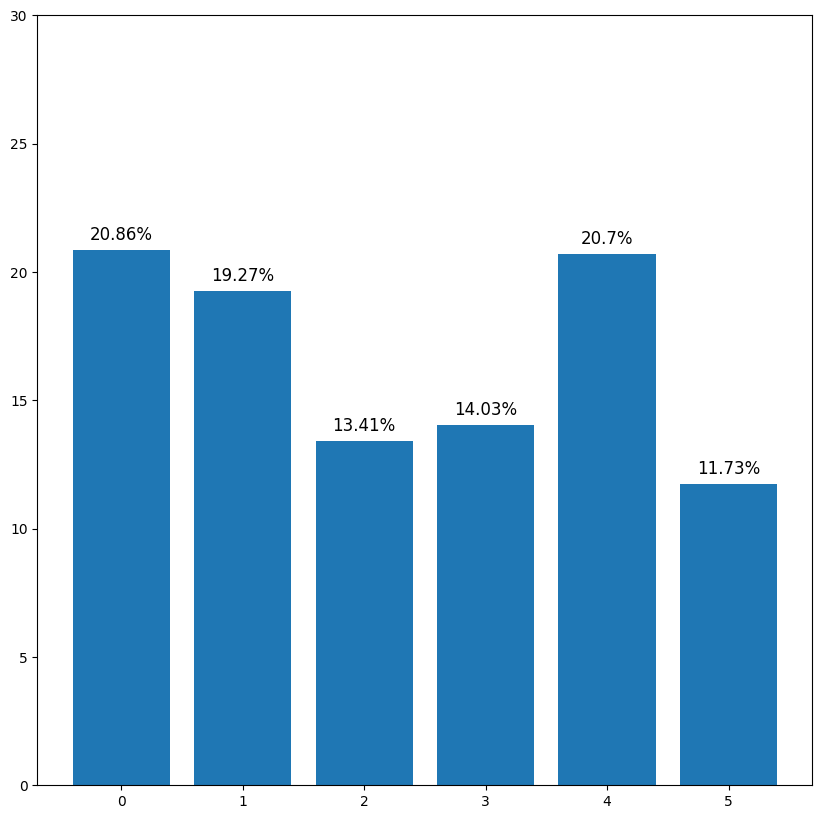

In [130]:
plt.figure(figsize=(10,10))
plt.bar(clusters_count['cluster'], clusters_count['percentage'])

number_bar = range(len(clusters_count['cluster']))
for i in number_bar:
  plt.text(x = clusters_count['cluster'][i], y = clusters_count['percentage'][i] + 0.4, s = str(clusters_count['percentage'][i]) + '%', size=12, ha='center')

plt.ylim(0,30)

In [131]:
list(df_new)

['host_identity_verified',
 'neighbourhood_group',
 'lat',
 'long',
 'instant_bookable',
 'cancellation_policy',
 'room_type',
 'construction_year',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'review_rate_number',
 'calculated_host_listings_count',
 'availability_365',
 'cluster']

In [136]:
median_cluster = df_new.groupby('cluster')[['host_identity_verified',
 'neighbourhood_group',
 'instant_bookable',
 'cancellation_policy',
 'room_type',
 'construction_year',
 'minimum_nights',
 'number_of_reviews',
 'review_rate_number',
 'calculated_host_listings_count',
 'availability_365',
 'price']].agg(['median']).reset_index()

median_cluster

,cluster,host_identity_verified,neighbourhood_group,instant_bookable,cancellation_policy,room_type,construction_year,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365,price
,,median,median,median,median,median,median,median,median,median,median,median,median
0,0,1.0,2.0,0.0,1.0,0.0,2013.0,3.0,6.0,3.0,1.0,16.0,260.0
1,1,1.0,2.0,1.0,1.0,0.0,2012.0,3.0,6.0,3.0,1.0,17.0,1029.0
2,2,0.0,2.0,0.0,1.0,0.0,2012.0,3.0,9.0,3.0,2.0,303.0,558.0
3,3,0.0,2.0,0.0,1.0,0.0,2012.0,3.0,9.0,3.0,2.0,309.0,975.0
4,4,1.0,2.0,0.0,1.0,0.0,2012.0,3.0,6.0,3.0,1.0,18.0,659.0
5,5,0.0,2.0,0.0,1.0,0.0,2012.0,3.0,8.0,3.0,2.0,301.0,205.0


In [134]:
median_cluster = df_new.groupby('cluster')[['host_identity_verified',
 'instant_bookable',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'price']].agg(['median']).reset_index()

median_cluster

,cluster,host_identity_verified,instant_bookable,number_of_reviews,calculated_host_listings_count,availability_365,price
,,median,median,median,median,median,median
0,0,1.0,0.0,6.0,1.0,16.0,260.0
1,1,1.0,1.0,6.0,1.0,17.0,1029.0
2,2,0.0,0.0,9.0,2.0,303.0,558.0
3,3,0.0,0.0,9.0,2.0,309.0,975.0
4,4,1.0,0.0,6.0,1.0,18.0,659.0
5,5,0.0,0.0,8.0,2.0,301.0,205.0
